1) What are the factors that influence the number of bikes rented?

2) Explore the data for outliers and missing values.

3) Plot the correlation between the variables and state your comments

4) Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.

5) Coment on Model performance by using approapriate diagnostics and measures

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [4]:
import requests #importing data SeoulBikeData.csv using the web link
url = 'https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%203-1%20Linear%20Regression/Project/SeoulBikeData.csv?token=AR7HP3HPMDBCESGXPWTIOS3AKZWLM'
res = requests.get(url, allow_redirects=True)
with open('SeoulBikeData.csv','wb') as file:
    file.write(res.content)
Seoul_Bike = pd.read_csv('SeoulBikeData.csv')

In [5]:
print(Seoul_Bike.head())
print(Seoul_Bike.describe())
print(Seoul_Bike)
print(Seoul_Bike.info())
print(list(set(Seoul_Bike.dtypes.tolist())))
print(list(Seoul_Bike.columns))
print(Seoul_Bike.corr())
print(Seoul_Bike.isna().sum())

         Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]
       Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000

In [6]:
df_num = Seoul_Bike.select_dtypes(include = ['float64', 'int64']) #droping the non numerical variables
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)
corr = df_num.corr()['Rented Bike Count']
Related_list = corr[abs(corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with Rented Bike Count:\n{}".format(len(Related_list), Related_list)) 


There is 10 strongly correlated values with Rented Bike Count:
Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Name: Rented Bike Count, dtype: float64


In [48]:
# from the Data SeoulBikeData we split in 2 data frame train for trainning and test for testing 
train = df_num[:10]
test = df_num[10:]
t_cor = train.corr()
t_cor # correlation between the variables in the training data


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.617831,-0.690229,-0.260252,-0.343127,-0.256052,-0.539033,0.293801,NaN,NaN
Hour,0.617831,1.000000,-0.856178,-0.591868,-0.411536,-0.522233,-0.886409,0.542003,NaN,NaN
Temperature(C),-0.690229,-0.856178,1.000000,0.109562,0.394660,0.074947,0.546353,-0.101001,NaN,NaN
Humidity(%),-0.260252,-0.591868,0.109562,1.000000,0.208399,0.918396,0.890965,-0.919427,NaN,NaN
Wind speed (m/s),-0.343127,-0.411536,0.394660,0.208399,1.000000,0.444379,0.391300,-0.449995,NaN,NaN
Visibility (10m),-0.256052,-0.522233,0.074947,0.918396,0.444379,1.000000,0.825228,-0.999059,NaN,NaN
Dew point temperature(C),-0.539033,-0.886409,0.546353,0.890965,0.391300,0.825228,1.000000,-0.837867,NaN,NaN
Solar Radiation (MJ/m2),0.293801,0.542003,-0.101001,-0.919427,-0.449995,-0.999059,-0.837867,1.000000,NaN,NaN
Rainfall(mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snowfall (cm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(test.corr())

                          Rented Bike Count  ...  Snowfall (cm)
Rented Bike Count                  1.000000  ...      -0.141974
Hour                               0.409823  ...      -0.021730
Temperature(C)                     0.538383  ...      -0.219050
Humidity(%)                       -0.200732  ...       0.108047
Wind speed (m/s)                   0.120933  ...      -0.003645
Visibility (10m)                   0.200102  ...      -0.121575
Dew point temperature(C)           0.379338  ...      -0.151503
Solar Radiation (MJ/m2)            0.261516  ...      -0.072442
Rainfall(mm)                      -0.123209  ...       0.008474
Snowfall (cm)                     -0.141974  ...       1.000000

[10 rows x 10 columns]


In [10]:
t_cor = t_cor['Rented Bike Count'] [:] # storng correlation >.3 + or - between 'Rented Bike Count' and other variables
t_cor[abs(t_cor)>0.30].sort_values(ascending=False)

Rented Bike Count           1.000000
Hour                        0.617831
Wind speed (m/s)           -0.343127
Dew point temperature(C)   -0.539033
Temperature(C)             -0.690229
Name: Rented Bike Count, dtype: float64

In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         10 non-null     int64  
 1   Hour                      10 non-null     int64  
 2   Temperature(C)            10 non-null     float64
 3   Humidity(%)               10 non-null     int64  
 4   Wind speed (m/s)          10 non-null     float64
 5   Visibility (10m)          10 non-null     int64  
 6   Dew point temperature(C)  10 non-null     float64
 7   Solar Radiation (MJ/m2)   10 non-null     float64
 8   Rainfall(mm)              10 non-null     float64
 9   Snowfall (cm)             10 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 928.0 bytes
None


In [15]:
# test.drop(['Rented Bike Count'],axis = 1, inplace = True)
train = train[['Rented Bike Count','Hour','Temperature(C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
test = test[['Hour','Temperature(C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]


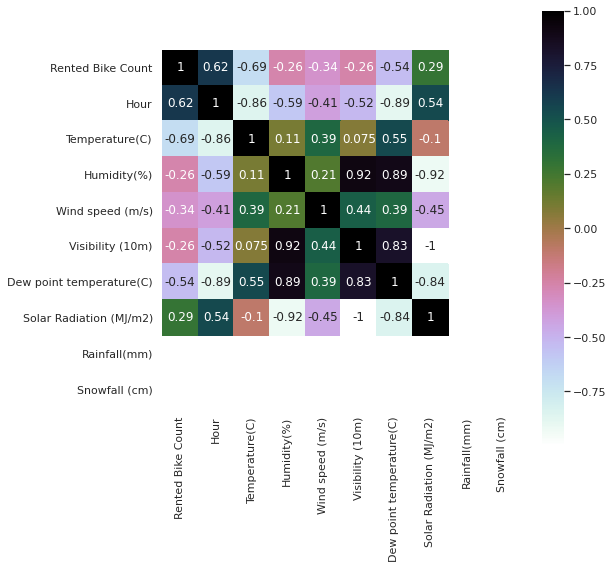

In [20]:
corr = train.corr()  # using the heatmap to show the correlation between the vvariables
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.25)
#considering only the highly correlated features for training and validation
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (3, 9)
Dimension of train_y dataframe: (3,)
Dimension of val_x dataframe: (2, 9)
Dimension of val_y dataframe: (2,)


In [39]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 387.001980097412
Mean Square Error of linear regression: 150973.79479419088
R_Squared Score of linear regression: -98.26964257911904


In [47]:


#final prediction on test data
predic_test = ln_reg.predict(test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Hour':test.Hour,'Pred_RentedBike':predic_test})
submission_data
val_y = pd.DataFrame(val_y)
val_y['Predicted'] = submission_data['Pred_RentedBike']

val_y

,Rented Bike Count,Predicted
4,78,NaN
8,930,NaN


In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score -24.549925062844885
number of feature used: 7


In [44]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score -52.659325983911465
number of feature used: 4


 Ridge regression has a better trainning score and uses more variables.